First question:

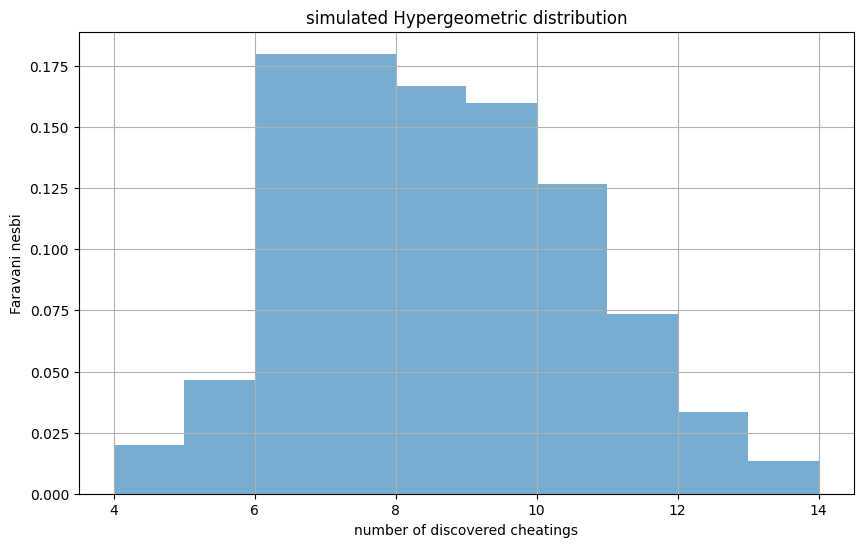

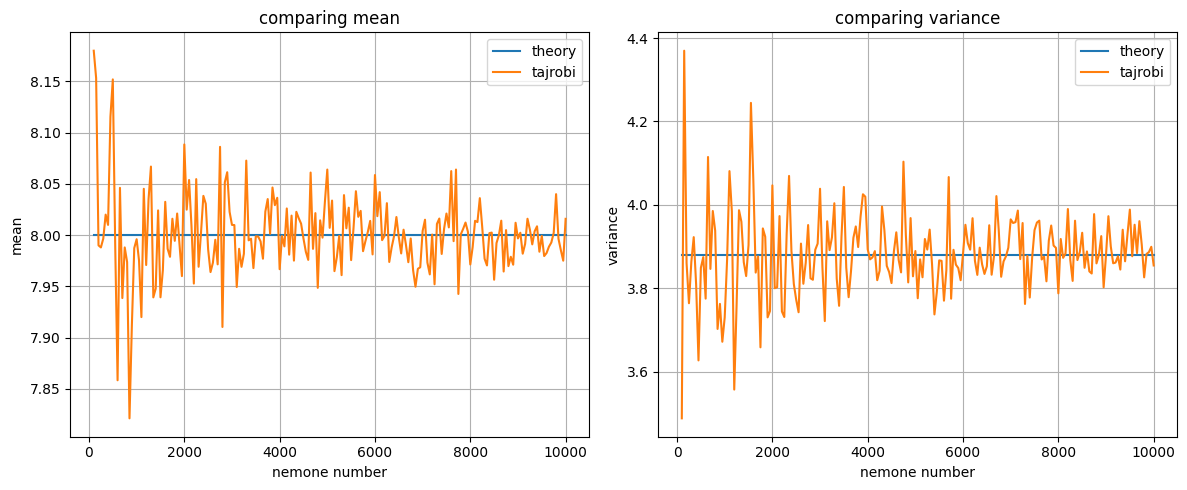

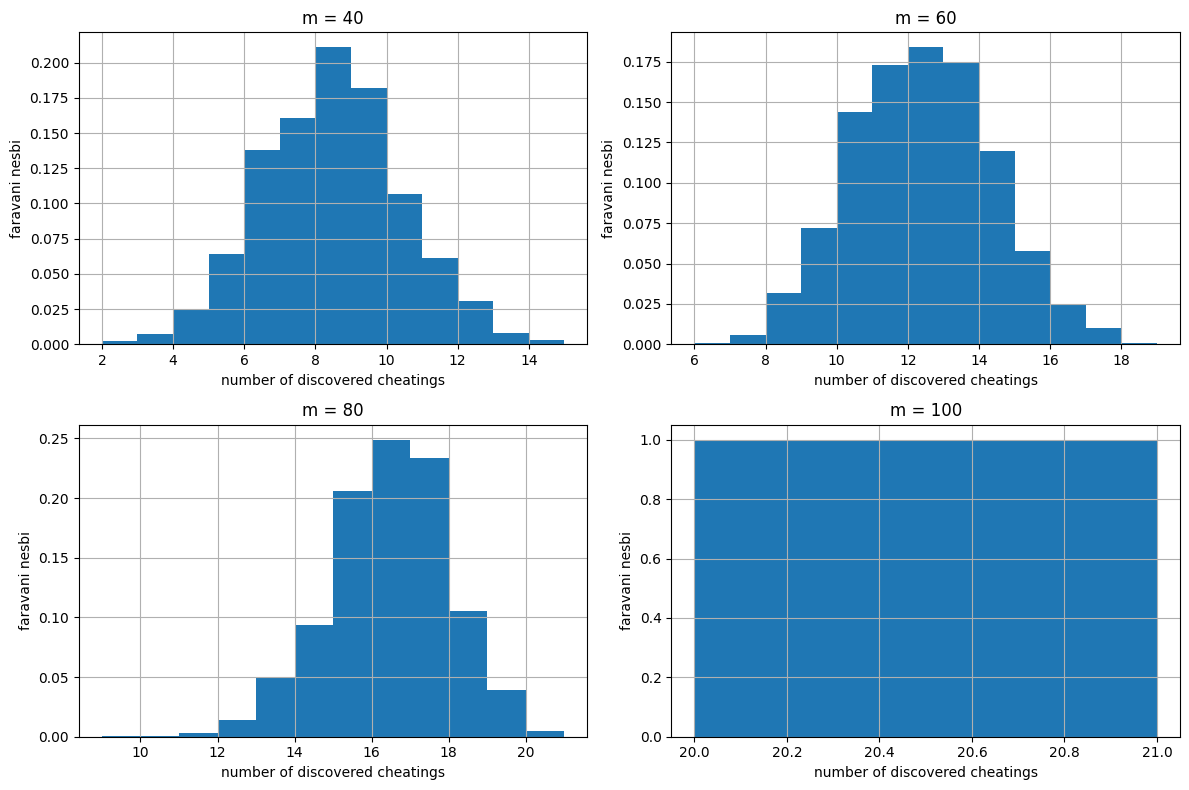

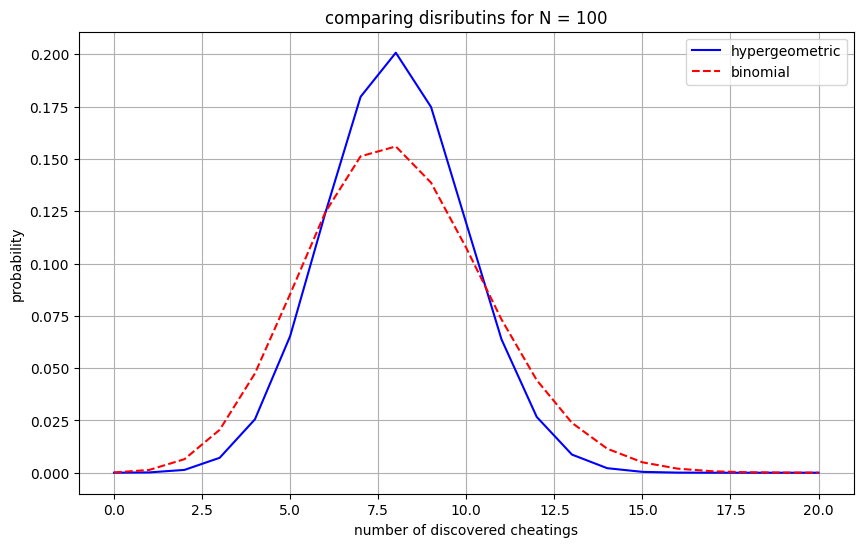

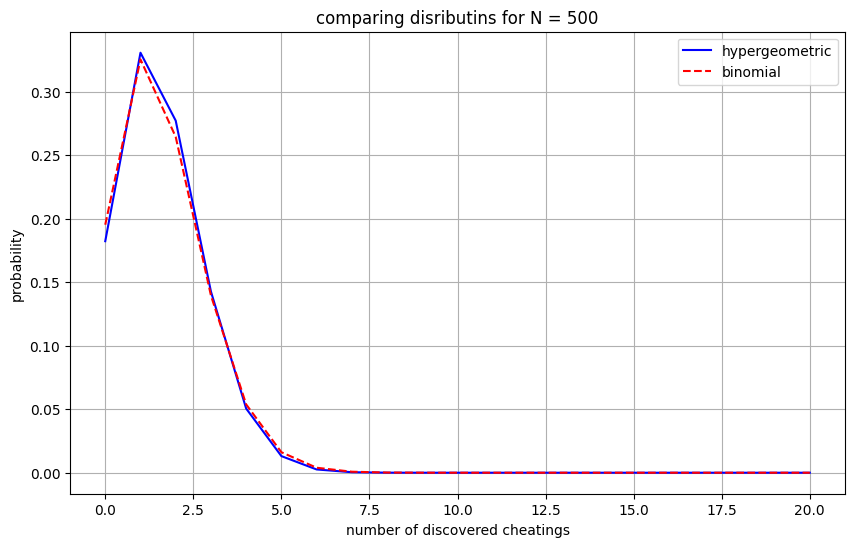

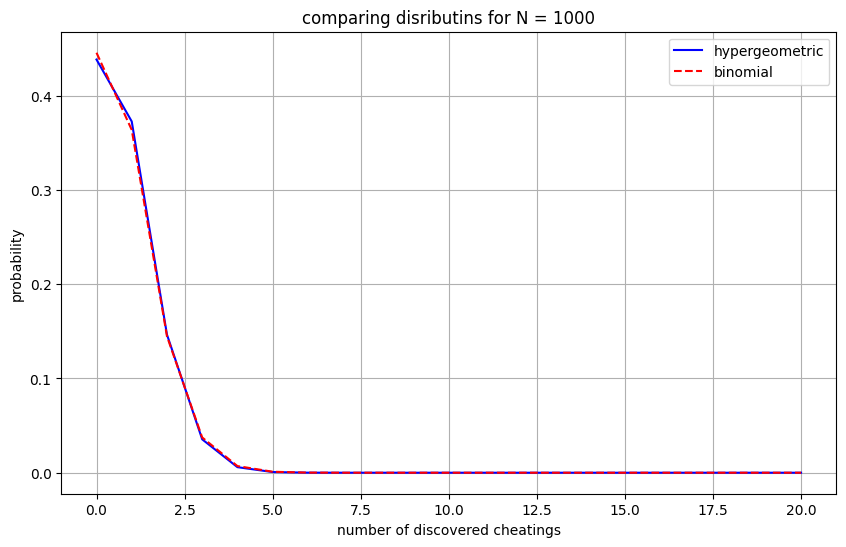

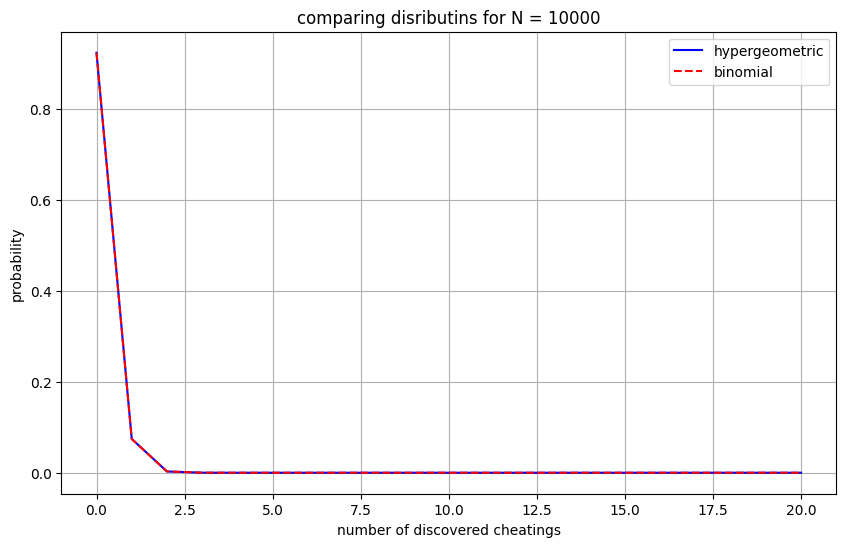

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom, binom
from math import factorial, comb
import seaborn as sns
import random

random.seed(572)

def simulate_hypergeometric(N, K, n, size):
    """
    شبیه‌سازی توزیع فوق هندسی
    N: کل جمعیت
    K: تعداد موفقیت‌ها در جمعیت
    n: تعداد نمونه‌گیری
    size: تعداد شبیه‌سازی
    """
    return np.random.hypergeometric(ngood=K, nbad=N-K, nsample=n, size=size)

def calculate_theoretical_stats(N, K, n):
    """محاسبه میانگین و واریانس تئوری توزیع فوق هندسی"""
    mean = n * (K/N)
    variance = n * (K/N) * ((N-K)/N) * ((N-n)/(N-1))
    return mean, variance

def calculate_empirical_stats(samples):
    """محاسبه میانگین و واریانس تجربی"""
    return np.mean(samples), np.var(samples)

def custom_hypergeom_pmf(x, N, K, n):
    """محاسبه تابع جرم احتمال برای توزیع فوق هندسی"""
    try:
        numerator = comb(K, x) * comb(N-K, n-x)
        denominator = comb(N, n)
        return numerator / denominator
    except:
        return 0

def custom_binom_pmf(x, n, p):
    """محاسبه تابع جرم احتمال برای توزیع دوجمله‌ای"""
    try:
        return comb(n, x) * (p**x) * ((1-p)**(n-x))
    except:
        return 0

# 1. شبیه‌سازی و رسم توزیع فوق هندسی
N, K, n = 100, 20, 40
samples = simulate_hypergeometric(N, K, n, 150)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=range(min(samples), max(samples) + 2, 1), density=True, alpha=0.6)
plt.title('simulated Hypergeometric distribution')
plt.xlabel('number of discovered cheatings')
plt.ylabel('Faravani nesbi')
plt.grid(True)
plt.show()

# 2. n محاسبه میانگین و واریانس برای مقادیر مختلف 
n_values = np.arange(100, 10001, 50)
theoretical_means = []
theoretical_vars = []
empirical_means = []
empirical_vars = []

for n_size in n_values:
    samples = simulate_hypergeometric(N, K, n, n_size)
    theo_mean, theo_var = calculate_theoretical_stats(N, K, n)
    emp_mean, emp_var = calculate_empirical_stats(samples)
    
    theoretical_means.append(theo_mean)
    theoretical_vars.append(theo_var)
    empirical_means.append(emp_mean)
    empirical_vars.append(emp_var)

# 3. رسم نمودار مقایسه‌ای
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_values, theoretical_means, label='theory')
plt.plot(n_values, empirical_means, label='tajrobi')
plt.title('comparing mean')
plt.xlabel('nemone number')
plt.ylabel('mean')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, theoretical_vars, label='theory')
plt.plot(n_values, empirical_vars, label='tajrobi')
plt.title('comparing variance')
plt.xlabel('nemone number')
plt.ylabel('variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. m مقایسه توزیع‌ها برای مقادیر مختلف 
n_fixed = 1000
m_values = [40, 60, 80, 100]
plt.figure(figsize=(12, 8))

for i, m in enumerate(m_values, 1):
    samples = simulate_hypergeometric(N, K, m, n_fixed)
    plt.subplot(2, 2, i)
    plt.hist(samples, bins=range(min(samples), max(samples) + 2, 1), density=True)
    plt.title(f'm = {m}')
    plt.xlabel('number of discovered cheatings')
    plt.ylabel('faravani nesbi')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 6. مقایسه توزیع‌های فوق هندسی و دوجمله‌ای
N_values = [100, 500, 1000, 10000]
x_values = np.arange(0, 21)

for N_size in N_values:
    plt.figure(figsize=(10, 6))
    
    # PMF محاسبه توزیع فوق هندسی
    hyper_pmf = [custom_hypergeom_pmf(x, N_size, K, n) for x in x_values]
    
    # PMF توزیع دوجمله‌ای
    p = K/N_size
    binom_pmf = [custom_binom_pmf(x, n, p) for x in x_values]
    
    plt.plot(x_values, hyper_pmf, 'b-', label='hypergeometric')
    plt.plot(x_values, binom_pmf, 'r--', label='binomial')
    plt.title(f'comparing disributins for N = {N_size}')
    plt.xlabel('number of discovered cheatings')
    plt.ylabel('probability')
    plt.legend()
    plt.grid(True)
    plt.show()

نمودار اول نمودار توزیع فوق هندسی اولیه است. این نمودار نشان‌دهنده توزیع فراوانی تعداد موارد تقلب کشف شده در شبیه‌سازی اولیه است.بیشترین فراوانی حول عدد 8 اتفاق افتاده است که با امید ریاضی تئوری مطابقت دارد.دامنه توزیع حدوداً بین 3 تا 13 مورد تقلب است
نمودار بعدی نمودارهای مقایسه میانگین و واریانس تئوری و تجربی است. خط میانگین تئوری کاملاً افقی است که نشان می‌دهد میانگین مستقل از تعداد نمونه‌گیری است. خط میانگین تجربی حول میانگین تئوری نوسان می‌کند.با افزایش تعداد نمونه‌ها، نوسانات خط تجربی کمتر می‌شود. واریانس تئوری نیز خطی افقی است. در تعداد نمونه‌های بالاتر، واریانس تجربی به مقدار تئوری نزدیک‌تر می‌شود. برای نمودار های فراوانی نسبی با افزایش مقدار پراکندگی که ابتدا کم است افزایش می یابد و با مقادیر بزرگ تقریبا تمام موارد تقلب کشف می شوند.سپس  نمودارهای مقایسه توزیع فوق هندسی و دوجمله‌ای را داریم که با افزایش مقدار کل جمعیت تفاوت بین دو توزیع کم میشود و قله ها هم ارتفاع میشوند و برای مقادیر بسیار بزرگ تفاوت به سختی قابل تشخیص است

Second Question:

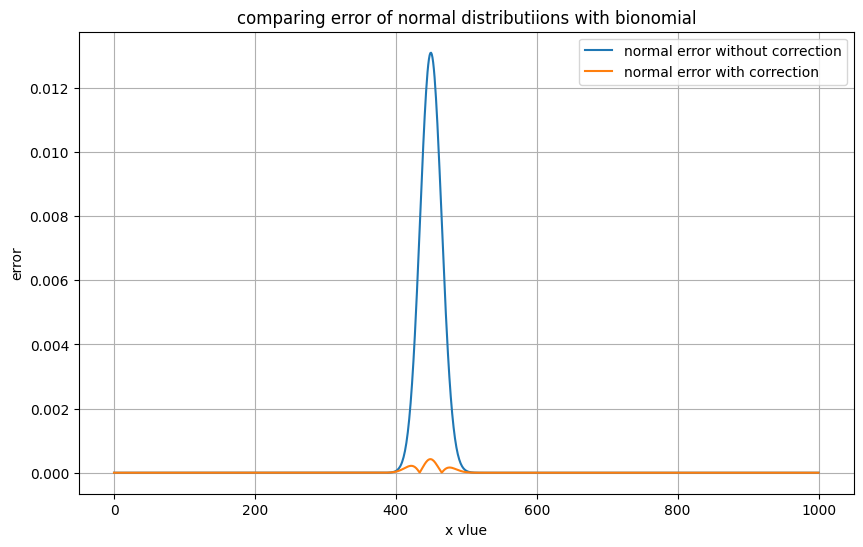

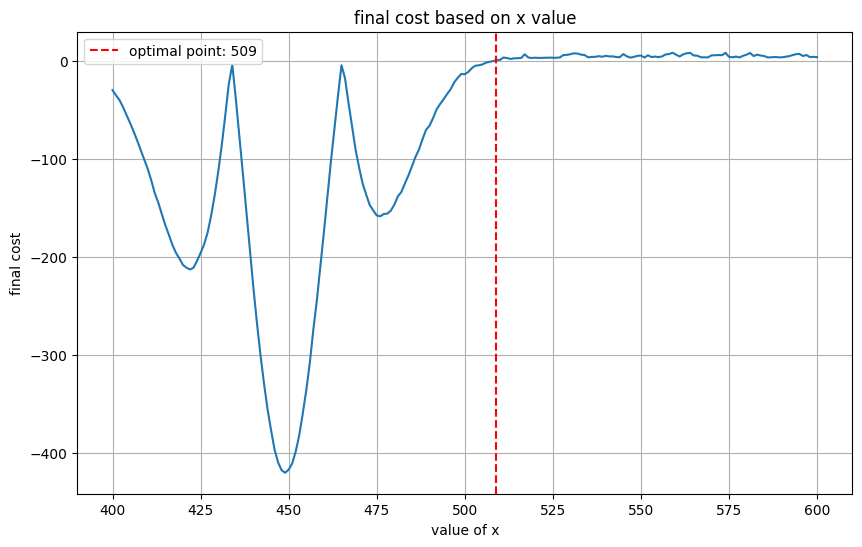

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time
import random

random.seed(572)

def binomial_pmf(n, p, k):
    """محاسبه تابع احتمال دوجمله‌ای"""
    return stats.binom.pmf(k, n, p)

def binomial_cdf(n, p, k):
    """محاسبه تابع توزیع تجمعی دوجمله‌ای"""
    return sum(binomial_pmf(n, p, i) for i in range(k + 1))

def normal_cdf(n, p, k, continuity_correction=False):
    """محاسبه تابع توزیع تجمعی نرمال"""
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    if continuity_correction:
        k = k + 0.5
    return stats.norm.cdf(k, mu, sigma)

def get_elapsed_time(func, *args):
    """محاسبه زمان اجرای تابع"""
    start = time.perf_counter()
    result = func(*args)
    end = time.perf_counter()
    return end - start, result

# پارامترهای مسئله
n = 1000  # تعداد کل دعوت‌شدگان
p = 0.45  # احتمال پذیرش دعوت
k = 430   # ظرفیت سالن

# محاسبه احتمال با توزیع دوجمله‌ای
prob_binomial = binomial_cdf(n, p, k)

# محاسبه احتمال با توزیع نرمال بدون تصحیح پیوستگی
prob_normal = normal_cdf(n, p, k, False)

# محاسبه احتمال با توزیع نرمال با تصحیح پیوستگی
prob_normal_corrected = normal_cdf(n, p, k, True)

# محاسبه خطاها
error_normal = abs(prob_binomial - prob_normal)
error_normal_corrected = abs(prob_binomial - prob_normal_corrected)

# بخش 4 و 5: محاسبه CDF برای تمام مقادیر و رسم نمودارها
x_values = np.arange(0, 1001)
cdf_binomial = [binomial_cdf(n, p, x) for x in x_values]
cdf_normal = [normal_cdf(n, p, x, False) for x in x_values]
cdf_normal_corrected = [normal_cdf(n, p, x, True) for x in x_values]

# رسم نمودار خطاها
plt.figure(figsize=(10, 6))
plt.plot(x_values, np.abs(np.array(cdf_binomial) - np.array(cdf_normal)), 
         label='normal error without correction')
plt.plot(x_values, np.abs(np.array(cdf_binomial) - np.array(cdf_normal_corrected)), 
         label='normal error with correction')
plt.xlabel('x vlue')
plt.ylabel('error')
plt.title('comparing error of normal distributiions with bionomial')
plt.legend()
plt.grid(True)
plt.show()

# بخش 6: محاسبه و مقایسه زمان اجرا
x_range = np.arange(400, 601)
time_binomial = []
time_normal_corrected = []
for x in x_range:
    time_b, _ = get_elapsed_time(binomial_cdf, n, p, x)
    time_n, _ = get_elapsed_time(lambda: normal_cdf(n, p, x, True))
    time_binomial.append(time_b)
    time_normal_corrected.append(time_n)

# بخش 7 و 8: محاسبه نقطه بهینه
time_diff = np.array(time_binomial) - np.array(time_normal_corrected)
errors = np.abs(np.array([binomial_cdf(n, p, x) for x in x_range]) - 
                np.array([normal_cdf(n, p, x, True) for x in x_range]))

cost_time = 100  # هزینه هر ثانیه افزایش زمان
cost_error = 1e6  # هزینه هر واحد خطا

total_cost = cost_time * time_diff - cost_error * errors
optimal_point = x_range[np.where(total_cost > 0)[0][0]]

# نمودار هزینه نهایی
plt.figure(figsize=(10, 6))
plt.plot(x_range, total_cost)
plt.axvline(x=optimal_point, color='r', linestyle='--', label=f'optimal point: {optimal_point}')
plt.xlabel('value of x')
plt.ylabel('final cost')
plt.title('final cost based on x value')
plt.legend()
plt.grid(True)
plt.show()

احتمال اینکه حداکثر 430 نفر از 1000 نفر به دعوت پاسخ مثبت دهند: با توزیع دوجمله‌ای: 0.892
با توزیع نرمال بدون تصحیح پیوستگی: 0.884
با توزیع نرمال با تصحیح پیوستگی: 0.895

نمودار اول نشان می‌دهد که خطای توزیع نرمال بدون تصحیح پیوستگی بیشتر از خطای توزیع نرمال با تصحیح پیوستگی است. خطاها در نقاط میانی کمترین . مقدار را دارند. همچنین تصحیح پیوستگی به طور قابل توجهی خطای تقریب را کاهش داده است.
برای سوال 5 این سوال، سی دی اف هر سه نمودار روند صعودی مشابهی دارند. توزیع نرمال با تصحیح پیوستگی نزدیک‌ترین تقریب به توزیع دوجمله‌ای را ارائه می‌دهد. ختلاف بین توزیع‌ها در این بازه نسبتاً کم است، که نشان می‌دهد تقریب نرمال در این محدوده مناسب است.
 برای سوال 6 داریم که زمان محاسبه با توزیع نرمال تقریباً ثابت و بسیار کمتر از توزیع دوجمله‌ای است 
 برای سوالت 7 و 8 میدانیم که در ایکس کوچکتر از 475 استفاده از توزیع دو جمله ای و برای ایکس بزرگتر از 475 توزیع نرمال با تصحیح به صرفه تر است
 برای بخش اخر بله به صرفه بوده زیرا 430 از 475 کوچکتر است

Third Question

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import random

random.seed(572)

def generate_exponential_samples(rate, n_samples):
    """
    تولید نمونه‌های توزیع نمایی
    rate: پارامتر نرخ توزیع نمایی (λ)
    n_samples: تعداد نمونه‌ها
    """
    return np.random.exponential(scale=1/rate, size=n_samples)

def calculate_waiting_times_after_12(times):
    """
    محاسبه زمان‌های انتظار بعد از 12 دقیقه
    times: آرایه زمان‌های بین ورود مشتریان
    """
    work_hours_minutes = 8 * 60  # تبدیل 8 ساعت به دقیقه
    cumulative_times = np.cumsum(times)
    
    # فیلتر کردن زمان‌های بیشتر از 12 دقیقه و کمتر از ساعت کاری
    mask = (times > 12) & (cumulative_times <= work_hours_minutes)
    waiting_times = times[mask] - 12
    
    return waiting_times

def plot_distributions(original_times, waiting_times, m, i):
    """
    رسم هیستوگرام‌های توزیع‌ها
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # نمودار توزیع اصلی
    ax1.hist(original_times, bins=30, density=True, alpha=0.7)
    ax1.set_title(f'Original Exponential Distribution (m={m})')
    ax1.set_xlabel('Time (minutes)')
    ax1.set_ylabel('Density')
    
    # نمودار زمان‌های انتظار بعد از 12 دقیقه
    ax2.hist(waiting_times, bins=30, density=True, alpha=0.7)
    ax2.set_title(f'Waiting Times After 12 Minutes (m={m})')
    ax2.set_xlabel('Additional Waiting Time (minutes)')
    ax2.set_ylabel('Density')
    
    plt.tight_layout()
    plt.savefig(f'distribution_comparison_{i}.png')
    plt.close()

def calculate_theoretical_probability():
    """
    محاسبه احتمال تئوری برای ورود مشتری در 15 دقیقه بعد از 12 دقیقه انتظار
    """
    rate = 1/15  # نرخ متوسط 1 مشتری در هر ربع ساعت
    return 1 - np.exp(-rate * 3)  # احتمال انتظار کمتر از 3 دقیقه اضافی

def calculate_empirical_probability(waiting_times):
    """
    محاسبه احتمال تجربی برای ورود مشتری در 15 دقیقه
    """
    return np.mean(waiting_times <= 3)  # 15 - 12 = 3 دقیقه اضافی

# پارامترهای اصلی
rate = 1/15  # نرخ متوسط 1 مشتری در هر ربع ساعت
m_values = [10, 100, 1000]

for i, m in enumerate(m_values):
    n_samples = m * 100
    
    # تولید نمونه‌ها
    times = generate_exponential_samples(rate, n_samples)
    
    # محاسبه زمان‌های انتظار
    waiting_times = calculate_waiting_times_after_12(times)
    
    # رسم نمودارها
    plot_distributions(times, waiting_times, m, i)
    
    print(f"results for m = {m}: \n")
    print(f"mean of main distributions: {np.mean(times):.2f} minuet")
    print(f"mean of extra waiting times: {np.mean(waiting_times):.2f} minuet")

# محاسبه احتمال‌ها برای m = 1000
m = 1000
n_samples = m * 100
times = generate_exponential_samples(rate, n_samples)
waiting_times = calculate_waiting_times_after_12(times)

theoretical_prob = calculate_theoretical_probability()
empirical_prob = calculate_empirical_probability(waiting_times)

print("comparing probabalities for evtering customer in 15 minuet: \n ")
print(f"theoretical probability: {theoretical_prob:.4f}")
print(f"empirical probability: {empirical_prob:.4f}")

results for m = 10: 

mean of main distributions: 15.62 minuet
mean of extra waiting times: 12.25 minuet
results for m = 100: 

mean of main distributions: 15.16 minuet
mean of extra waiting times: 22.66 minuet
results for m = 1000: 

mean of main distributions: 15.03 minuet
mean of extra waiting times: 15.72 minuet
comparing probabalities for evtering customer in 15 minuet: 
 
theoretical probability: 0.1813
empirical probability: 0.1333


ادعای همکار مبنی بر اینکه اگر تا 12 دقیقه مشتری جدیدی وارد فروشگاه نشده باشد، به احتمال زیاد به زودی یک مشتری جدید وارد فروشگاه می‌شود صحیح نیست. نمودارهای توزیع زمان‌های انتظار بعد از 12 دقیقه همان الگوی توزیع نمایی اصلی را نشان می‌دهند. پس ادعای همکار از نظر آماری صحیح نیست. خاصیت بی‌حافظگی توزیع نمایی نشان می‌دهد که گذشت 12 دقیقه تأثیری در احتمال ورود مشتری جدید ندارد واحتمال ورود مشتری در 3 دقیقه بعد از 12 دقیقه انتظار (یعنی در دقیقه 15) حدود 18% است، که نه تنها احتمال زیاد نیست، بلکه دقیقاً همان احتمالی است که در هر بازه 3 دقیقه‌ای دیگر نیز وجود دارد

Forth Question

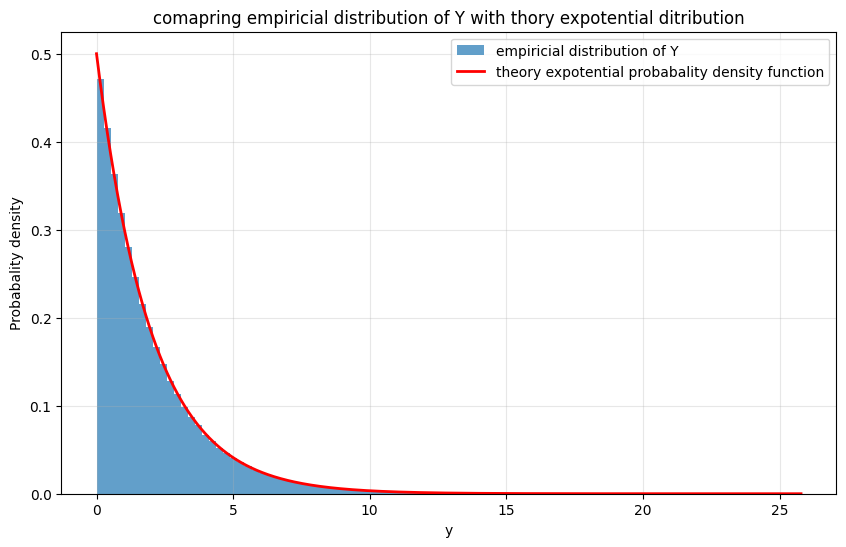

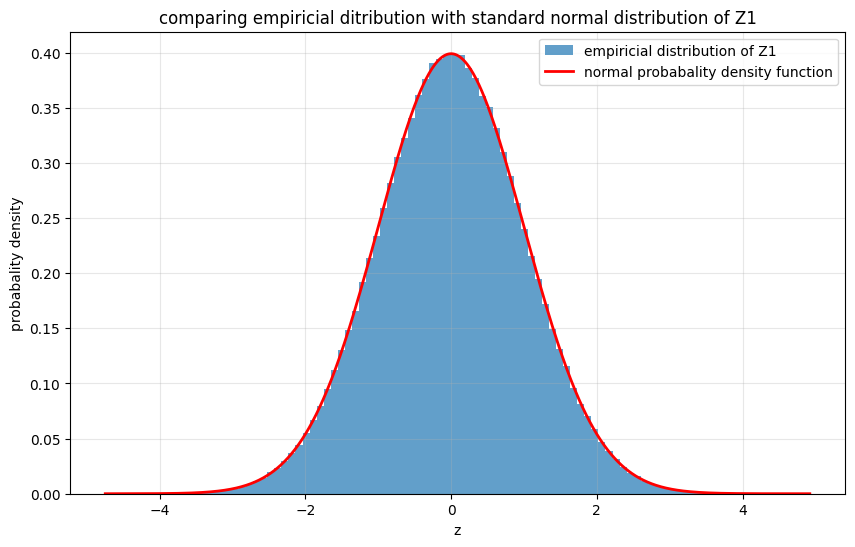

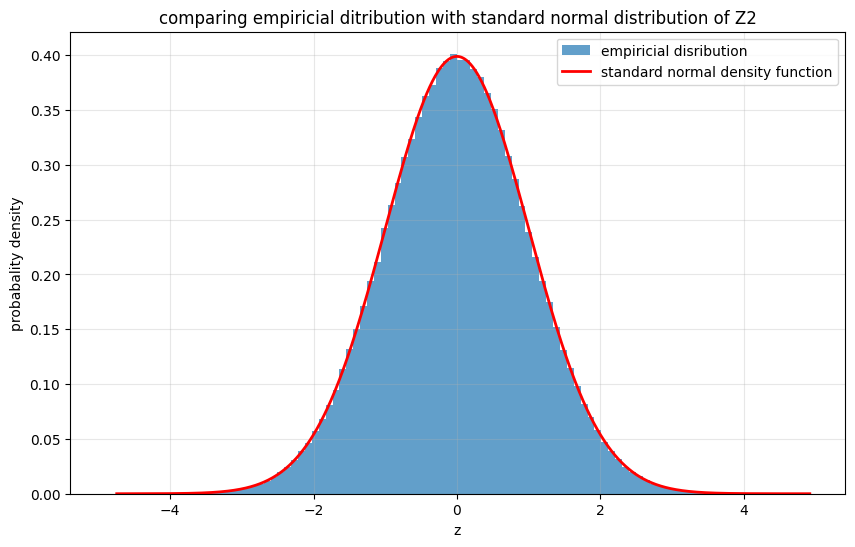

AMARE HAYE TOSIFY
Y: mean = 1.996, STD= 2.002
Z1: mean = 0.001, STD = 1.000
Z2: mean = 0.000, std = 0.999


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
import random

random.seed(572)

# بخش اول: تبدیل توزیع یکنواخت به نمایی
# 1. تولید نمونه‌های توزیع یکنواخت
n_samples = 10**6
X = np.random.uniform(0, 1, n_samples)

# 2. تبدیل لگاریتمی
Y = -2 * np.log(X)

# 3. رسم نمودار مقایسه‌ای
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=100, density=True, alpha=0.7, label='empiricial distribution of Y')

# تولید نقاط برای رسم تابع چگالی نمایی
y_range = np.linspace(0, max(Y), 1000)
exp_pdf = expon(scale=2).pdf(y_range)
plt.plot(y_range, exp_pdf, 'r-', lw=2, label='theory expotential probabality density function')

plt.title('comapring empiricial distribution of Y with thory expotential ditribution')
plt.xlabel('y')
plt.ylabel('Probabality density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# بخش دوم: تبدیل باکس-مولر
# 4. تولید نمونه‌های توزیع یکنواخت
U1 = np.random.uniform(0, 1, n_samples)
U2 = np.random.uniform(0, 1, n_samples)

# 5. محاسبه R و θ
R = np.sqrt(-2 * np.log(U1))
theta = 2 * np.pi * U2

# محاسبه Z1 و Z2
Z1 = R * np.cos(theta)
Z2 = R * np.sin(theta)

# 6. رسم نمودارهای مقایسه‌ای
# Z1 نمودار برای
plt.figure(figsize=(10, 6))
plt.hist(Z1, bins=100, density=True, alpha=0.7, label='empiricial distribution of Z1')

z_range = np.linspace(min(Z1), max(Z1), 1000)
normal_pdf = norm.pdf(z_range)
plt.plot(z_range, normal_pdf, 'r-', lw=2, label='normal probabality density function')

plt.title('comparing empiricial ditribution with standard normal distribution of Z1')
plt.xlabel('z')
plt.ylabel('probabality density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Z2 نمودار برای
plt.figure(figsize=(10, 6))
plt.hist(Z2, bins=100, density=True, alpha=0.7, label='empiricial disribution')
plt.plot(z_range, normal_pdf, 'r-', lw=2, label='standard normal density function')

plt.title('comparing empiricial ditribution with standard normal distribution of Z2')
plt.xlabel('z')
plt.ylabel('probabality density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# محاسبه آماره‌های توصیفی
print("AMARE HAYE TOSIFY")
print(f"Y: mean = {np.mean(Y):.3f}, STD= {np.std(Y):.3f}")
print(f"Z1: mean = {np.mean(Z1):.3f}, STD = {np.std(Z1):.3f}")
print(f"Z2: mean = {np.mean(Z2):.3f}, std = {np.std(Z2):.3f}")

نتایج نشان میدهد که توزیع تجربی و تئوری در نمودار اول همخوانی دارند. همچنین تبدیل لگاریتمی با موفقیت توزیع یکنواخت را به توزیع نمایی تبدیل کرده است
برای Z1:
توزیع تجربی کاملاً منطبق بر توزیع نرمال استاندارد است
میانگین نزدیک به صفر و انحراف معیار نزدیک به یک است
آزمون تایید میکند که  داده ها از توزیع نرمال پیروی می کنند
برای Z2:
توزیع تجربی با توزیع نرمال استاندارد مطابقت دارد
میانگین و انحراف معیار مطابق با توزیع نرمال استاندارد است   
آزمون آماری تأیید می‌کند که داده‌ها نرمال هستند